In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df = pd.read_csv('train.txt.csv', sep = ';',header=None,names = ['text', 'emotions'])

In [37]:
df.head()

,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [38]:
df.isnull().sum()

text        0
emotions    0
dtype: int64

In [39]:
unique_emotions= df['emotions'].unique()

In [40]:
unique_emotions_numbers = {}
i = 0
for emo in unique_emotions:
    unique_emotions_numbers[emo] = i
    i +=1
df['emotions'] = df['emotions'].map(unique_emotions_numbers)


In [41]:
df

,text,emotions
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,5
15998,i feel like this was such a rude comment and i...,1


In [42]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [43]:
#removing punchtuation


In [44]:
import string

In [45]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function
df['clean_text'] = df['text'].apply(remove_punc)

print(df)

                                                    text  emotions  \
0                                i didnt feel humiliated         0   
1      i can go from feeling so hopeless to so damned...         0   
2       im grabbing a minute to post i feel greedy wrong         1   
3      i am ever feeling nostalgic about the fireplac...         2   
4                                   i am feeling grouchy         1   
...                                                  ...       ...   
15995  i just had a very brief time in the beanbag an...         0   
15996  i am now turning and i feel pathetic that i am...         0   
15997                     i feel strong and good overall         5   
15998  i feel like this was such a rude comment and i...         1   
15999  i know a lot but i feel so stupid because i ca...         0   

                                              clean_text  
0                                i didnt feel humiliated  
1      i can go from feeling so hopeless 

In [46]:


def remove_numbers(txt):
    new = ""
    for i in txt:
        if not i.isdigit():
            new = new + i
    return new

df['text'] = df['text'].apply(remove_numbers)


In [47]:


def remove_emojis(txt):
    return ''.join(c for c in txt if c.isascii())

df['text'] = df['text'].apply(remove_numbers)


remove stopwords

In [48]:


def remove_numbers(txt):
    new = ""
    for i in txt:
        if not i.isdigit():
            new = new + i
    return new

df['text'] = df['text'].apply(remove_numbers)


In [49]:
import nltk

ModuleNotFoundError: No module named 'nltk'

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkit')
nltk.download('stopwords')


NameError: name 'nltk' is not defined

In [ ]:
stop_words = set(stopwords.words('english'))
len(stop_words)

198

In [ ]:
df.loc[1]['text']

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [ ]:


def remove(txt):
  words = txt.split()
  cleaned = []
  for i in words:
    if not i in stop_words:
      cleaned.append(i)

  return ' '.join(cleaned)


In [ ]:
df['text'] = df['text'].apply(remove)


In [ ]:
df.loc[1]['text']

'go feeling hopeless damned hopeful around someone cares awake'

In [ ]:


df.head()

,text,emotions,clean_text
0,didnt feel humiliated,0,i didnt feel humiliated
1,go feeling hopeless damned hopeful around some...,0,i can go from feeling so hopeless to so damned...
2,im grabbing minute post feel greedy wrong,1,im grabbing a minute to post i feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...,2,i am ever feeling nostalgic about the fireplac...
4,feeling grouchy,1,i am feeling grouchy


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotions'], test_size=0.20, random_state=42)


In [ ]:
X_train.shape

(12800,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
#bag of words

In [ ]:
bow_vectorizer = CountVectorizer()

In [ ]:
X_train_bow = bow_vectorizer.fit_transform(X_train) #naive bayes use
X_test_bow = bow_vectorizer.fit_transform(X_test)

In [ ]:


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)


nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)


pred_bow = nb_model.predict(X_test_bow)
print(accuracy_score(y_test, pred_bow))

0.768125


In [ ]:
pred_bow

array([0, 5, 0, ..., 5, 5, 0])

In [ ]:
y_test

,emotions
8756,0
4660,5
6095,0
304,5
8241,0
...,...
15578,5
5746,5
6395,5
7624,5


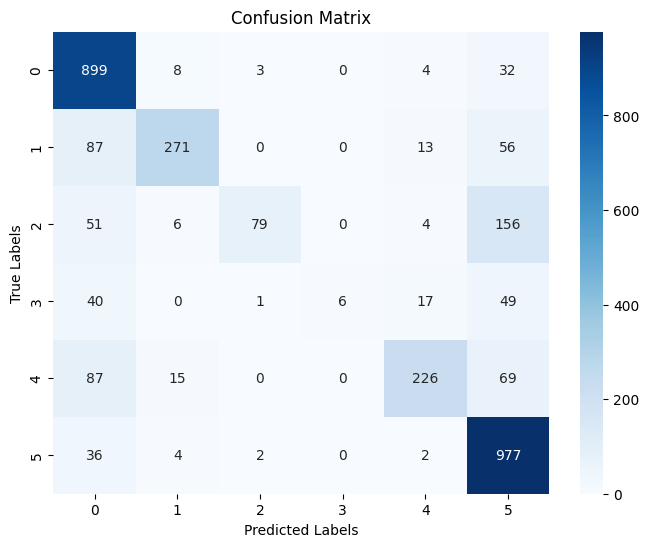

In [ ]:

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
nb2_model  = MultinomialNB()
nb2_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
y_pred = nb2_model.predict(X_test_tfidf)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6609375


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
loc_pred = logistic_model.predict(X_test_tfidf)

In [ ]:
print(accuracy_score(y_test,loc_pred))

0.8628125


In [52]:
import joblib

# Example objects
kmean_model = ...   # your trained KMeans model
scaler = ...        # your fitted scaler (e.g., StandardScaler)

# Save both using joblib
joblib.dump(kmean_model, "kmean_model.pkl")
joblib.dump(scaler, "vectorizer_tfidf"
".pkl")


['vectorizer_tfidf.pkl']